# Fitbit Data Overview

This notebook provides a top-line view of the compiled Fitbit data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('darkgrid')

## Load Data

In [2]:
# Load the compiled Parquet file
df = pd.read_parquet('../data/fitbit_compiled.parquet')

print(f"✓ Loaded {len(df):,} records")

✓ Loaded 1,724,960 records


## Dataset Summary

In [3]:
print("="*70)
print("DATASET SUMMARY")
print("="*70)
print(f"Total Records:        {len(df):,}")
print(f"Date Range:           {df['time'].min()} to {df['time'].max()}")
print(f"Number of Days:       {(df['time'].max() - df['time'].min()).days + 1}")
print(f"Memory Usage:         {df.memory_usage(deep=True).sum() / 1024 / 1024:.1f} MB")
print(f"Number of Columns:    {len(df.columns)}")
print(f"Measurement Types:    {df['measurement'].nunique()}")

DATASET SUMMARY
Total Records:        1,724,960
Date Range:           2025-10-02 19:48:30+00:00 to 2025-11-16 02:28:14+00:00
Number of Days:       45
Memory Usage:         972.3 MB
Number of Columns:    48
Measurement Types:    21


## Measurement Types Breakdown

In [4]:
measurement_counts = df['measurement'].value_counts()

print("\nMEASUREMENT TYPES:")
print("="*70)
for measurement, count in measurement_counts.items():
    pct = (count / len(df)) * 100
    print(f"{measurement:35s} {count:10,} records ({pct:5.1f}%)")


MEASUREMENT TYPES:
HeartRate_Intraday                   1,646,800 records ( 95.5%)
Steps_Intraday                          63,360 records (  3.7%)
GPS                                     12,091 records (  0.7%)
SleepLevels                              2,006 records (  0.1%)
SleepSummary                                53 records (  0.0%)
Activity-steps                              44 records (  0.0%)
Activity-calories                           44 records (  0.0%)
Activity-minutesVeryActive                  44 records (  0.0%)
Activity-minutesFairlyActive                44 records (  0.0%)
Activity-minutesLightlyActive               44 records (  0.0%)
Activity-distance                           44 records (  0.0%)
HR_Zones                                    44 records (  0.0%)
RestingHR                                   44 records (  0.0%)
DeviceBatteryLevel                          44 records (  0.0%)
Activity-minutesSedentary                   44 records (  0.0%)
HRV                 

## Visualization: Records by Measurement Type

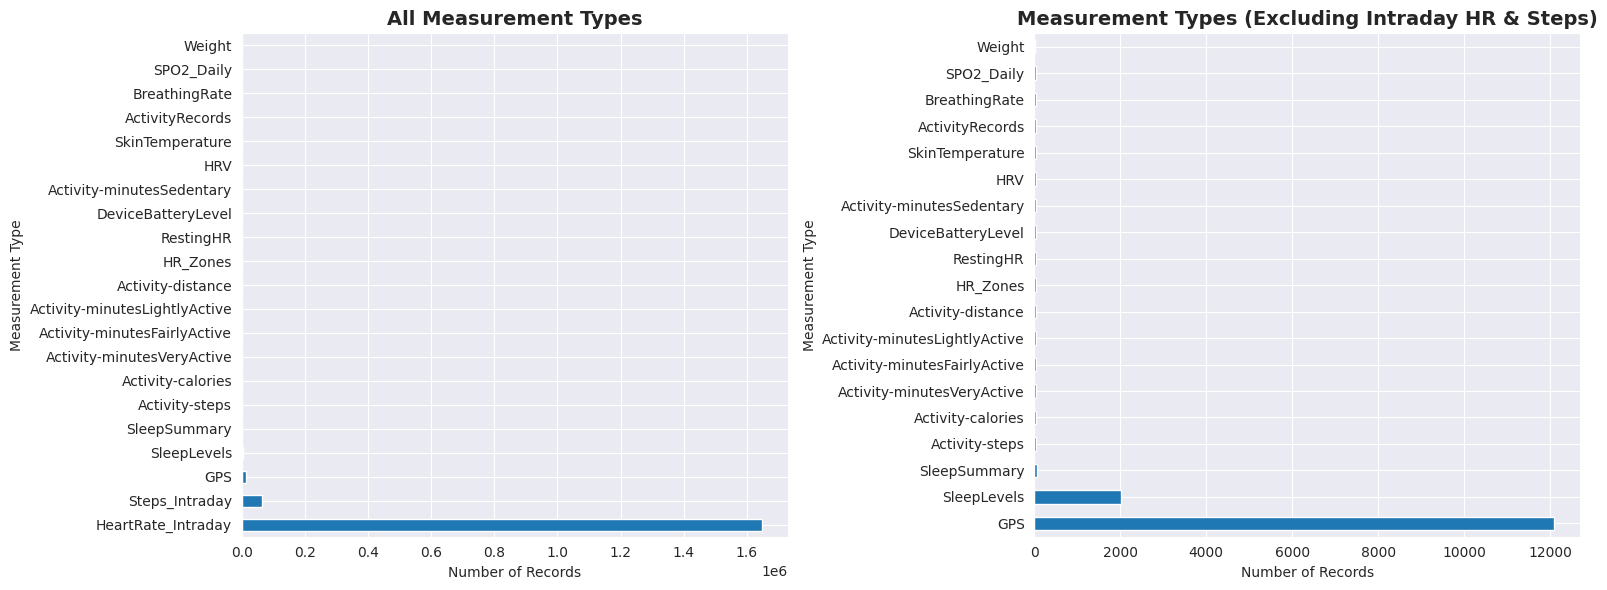

In [5]:
# Create a bar chart of measurement types
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# All measurement types
measurement_counts.plot(kind='barh', ax=ax1)
ax1.set_title('All Measurement Types', fontsize=14, fontweight='bold')
ax1.set_xlabel('Number of Records')
ax1.set_ylabel('Measurement Type')

# Excluding the two largest (intraday data) to see the others better
measurement_counts[2:].plot(kind='barh', ax=ax2)
ax2.set_title('Measurement Types (Excluding Intraday HR & Steps)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Number of Records')
ax2.set_ylabel('Measurement Type')

plt.tight_layout()
plt.show()

## Column Names

In [6]:
print("\nALL COLUMNS:")
print("="*70)
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    non_null = df[col].notna().sum()
    null_pct = (1 - non_null / len(df)) * 100
    print(f"{i:2d}. {col:35s} {str(dtype):20s} ({null_pct:5.1f}% null)")


ALL COLUMNS:
 1. measurement                         object               (  0.0% null)
 2. time                                datetime64[ns, UTC]  (  0.0% null)
 3. tag_Device                          object               (  0.7% null)
 4. field_value                         float64              (  0.8% null)
 5. field_dailyRmssd                    float64              (100.0% null)
 6. field_deepRmssd                     float64              (100.0% null)
 7. field_nightlyRelative               float64              (100.0% null)
 8. field_avg                           float64              (100.0% null)
 9. field_max                           float64              (100.0% null)
10. field_min                           float64              (100.0% null)
11. field_Out of Range                  float64              (100.0% null)
12. field_Fat Burn                      float64              (100.0% null)
13. field_Cardio                        float64              (100.0% null)
14. field_P

## Sample Data by Measurement Type

In [7]:
# Show sample of each measurement type
for measurement in measurement_counts.head(10).index:
    print("\n" + "="*70)
    print(f"SAMPLE: {measurement}")
    print("="*70)
    
    sample = df[df['measurement'] == measurement].head(3)
    
    # Only show non-null columns for this measurement type
    non_null_cols = sample.columns[sample.notna().any()].tolist()
    
    display(sample[non_null_cols])


SAMPLE: HeartRate_Intraday


,measurement,time,tag_Device,field_value
20,HeartRate_Intraday,2025-10-02 23:00:02+00:00,PixelWatch3,64.0
21,HeartRate_Intraday,2025-10-02 23:00:04+00:00,PixelWatch3,65.0
22,HeartRate_Intraday,2025-10-02 23:00:05+00:00,PixelWatch3,65.0



SAMPLE: Steps_Intraday


,measurement,time,tag_Device,field_value
19,Steps_Intraday,2025-10-02 23:00:00+00:00,PixelWatch3,0.0
45,Steps_Intraday,2025-10-02 23:01:00+00:00,PixelWatch3,0.0
71,Steps_Intraday,2025-10-02 23:02:00+00:00,PixelWatch3,0.0



SAMPLE: GPS


,measurement,time,field_distance,tag_ActivityID,field_lat,field_lon,field_altitude,field_heart_rate
818524,GPS,2025-10-24 18:38:31.536000+00:00,0.00000,2025-10-24T19:38:31.536000+00:00-Structured Wo...,53.572725,-2.434978,136.899,98.0
818528,GPS,2025-10-24 18:38:36.536000+00:00,3.95616,2025-10-24T19:38:31.536000+00:00-Structured Wo...,53.572725,-2.434978,136.899,98.0
818532,GPS,2025-10-24 18:38:41.536000+00:00,10.17472,2025-10-24T19:38:31.536000+00:00-Structured Wo...,53.572725,-2.434978,136.899,105.0



SAMPLE: SleepLevels


,measurement,time,tag_Device,tag_isMainSleep,field_level,field_duration_seconds
1,SleepLevels,2025-10-02 19:48:30+00:00,PixelWatch3,True,3.0,3960.0
2,SleepLevels,2025-10-02 20:54:30+00:00,PixelWatch3,True,0.0,480.0
3,SleepLevels,2025-10-02 21:02:30+00:00,PixelWatch3,True,3.0,840.0



SAMPLE: SleepSummary


,measurement,time,tag_Device,tag_isMainSleep,field_efficiency,field_minutesAsleep,field_minutesInBed,field_minutesAwake,field_minutesLight,field_minutesREM,field_minutesDeep,field_endTime
0,SleepSummary,2025-10-02 19:48:30+00:00,PixelWatch3,True,77.0,584.0,761.0,176.0,481.0,66.0,37.0,2025-10-03T08:29:30+00:00
32121,SleepSummary,2025-10-03 18:45:00+00:00,PixelWatch3,True,70.0,431.0,613.0,182.0,354.0,60.0,17.0,2025-10-04T04:58:00+00:00
78364,SleepSummary,2025-10-04 22:31:00+00:00,PixelWatch3,True,91.0,354.0,391.0,37.0,204.0,71.0,78.0,2025-10-05T05:02:00+00:00



SAMPLE: Activity-steps


,measurement,time,tag_Device,field_value
18948,Activity-steps,2025-10-03 11:00:00+00:00,PixelWatch3,2252.0
58737,Activity-steps,2025-10-04 11:00:00+00:00,PixelWatch3,7258.0
99595,Activity-steps,2025-10-05 11:00:00+00:00,PixelWatch3,5553.0



SAMPLE: Activity-calories


,measurement,time,tag_Device,field_value
18949,Activity-calories,2025-10-03 11:00:00+00:00,PixelWatch3,2180.0
58734,Activity-calories,2025-10-04 11:00:00+00:00,PixelWatch3,2280.0
99596,Activity-calories,2025-10-05 11:00:00+00:00,PixelWatch3,2316.0



SAMPLE: Activity-minutesVeryActive


,measurement,time,tag_Device,field_value
18950,Activity-minutesVeryActive,2025-10-03 11:00:00+00:00,PixelWatch3,0.0
58738,Activity-minutesVeryActive,2025-10-04 11:00:00+00:00,PixelWatch3,14.0
99594,Activity-minutesVeryActive,2025-10-05 11:00:00+00:00,PixelWatch3,0.0



SAMPLE: Activity-minutesFairlyActive


,measurement,time,tag_Device,field_value
18951,Activity-minutesFairlyActive,2025-10-03 11:00:00+00:00,PixelWatch3,0.0
58739,Activity-minutesFairlyActive,2025-10-04 11:00:00+00:00,PixelWatch3,6.0
99593,Activity-minutesFairlyActive,2025-10-05 11:00:00+00:00,PixelWatch3,0.0



SAMPLE: Activity-minutesLightlyActive


,measurement,time,tag_Device,field_value
18952,Activity-minutesLightlyActive,2025-10-03 11:00:00+00:00,PixelWatch3,224.0
58740,Activity-minutesLightlyActive,2025-10-04 11:00:00+00:00,PixelWatch3,197.0
99592,Activity-minutesLightlyActive,2025-10-05 11:00:00+00:00,PixelWatch3,210.0


## Daily Record Counts

In [8]:
# Add date column
df['date'] = df['time'].dt.date

# Count records per day
daily_counts = df.groupby('date').size().reset_index(name='record_count')

print("\nDAILY RECORD COUNTS:")
print("="*70)
print(daily_counts.to_string(index=False))


DAILY RECORD COUNTS:
      date  record_count
2025-10-02          1595
2025-10-03         38602
2025-10-04         40211
2025-10-05         42536
2025-10-06         37939
2025-10-07         42219
2025-10-08         34071
2025-10-09         22655
2025-10-10         39763
2025-10-11         37412
2025-10-12         37274
2025-10-13         42102
2025-10-14         39668
2025-10-15         41776
2025-10-16         38759
2025-10-17         36207
2025-10-18         35835
2025-10-19         34026
2025-10-20         42489
2025-10-21         36319
2025-10-22         23598
2025-10-23         40603
2025-10-24         39712
2025-10-25         40528
2025-10-26         38784
2025-10-27         39634
2025-10-28         42344
2025-10-29         41264
2025-10-30         40438
2025-10-31         42075
2025-11-01         40982
2025-11-02         39487
2025-11-03         44363
2025-11-04         39404
2025-11-05         41396
2025-11-06         46008
2025-11-07         40302
2025-11-08         40987
202

## Visualization: Records Per Day

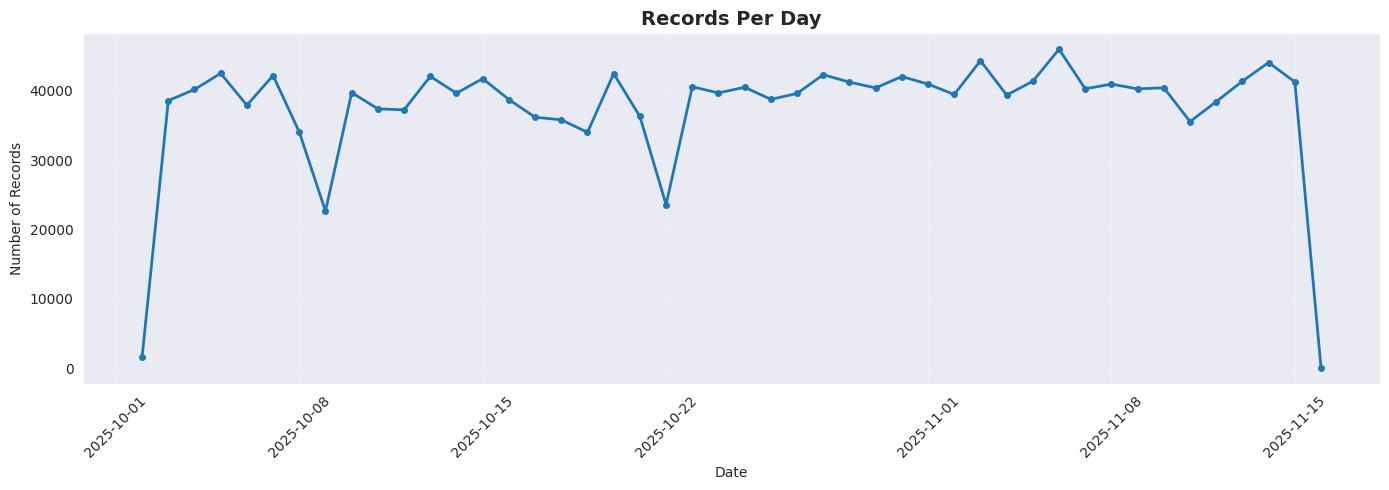


Average records per day: 37,499
Min records per day:     1 (on 2025-11-16)
Max records per day:     46,008 (on 2025-11-06)


In [9]:
fig, ax = plt.subplots(figsize=(14, 5))

daily_counts['date'] = pd.to_datetime(daily_counts['date'])
ax.plot(daily_counts['date'], daily_counts['record_count'], marker='o', linewidth=2, markersize=4)
ax.set_title('Records Per Day', fontsize=14, fontweight='bold')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Records')
ax.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(f"\nAverage records per day: {daily_counts['record_count'].mean():,.0f}")
print(f"Min records per day:     {daily_counts['record_count'].min():,} (on {daily_counts.loc[daily_counts['record_count'].idxmin(), 'date'].date()})")
print(f"Max records per day:     {daily_counts['record_count'].max():,} (on {daily_counts.loc[daily_counts['record_count'].idxmax(), 'date'].date()})")

## Quick Stats: Heart Rate


HEART RATE STATISTICS:
Total HR records:     1,646,800
Average HR:           63.8 bpm
Median HR:            62.0 bpm
Min HR:               35.0 bpm
Max HR:               193.0 bpm
Std Dev:              17.9 bpm


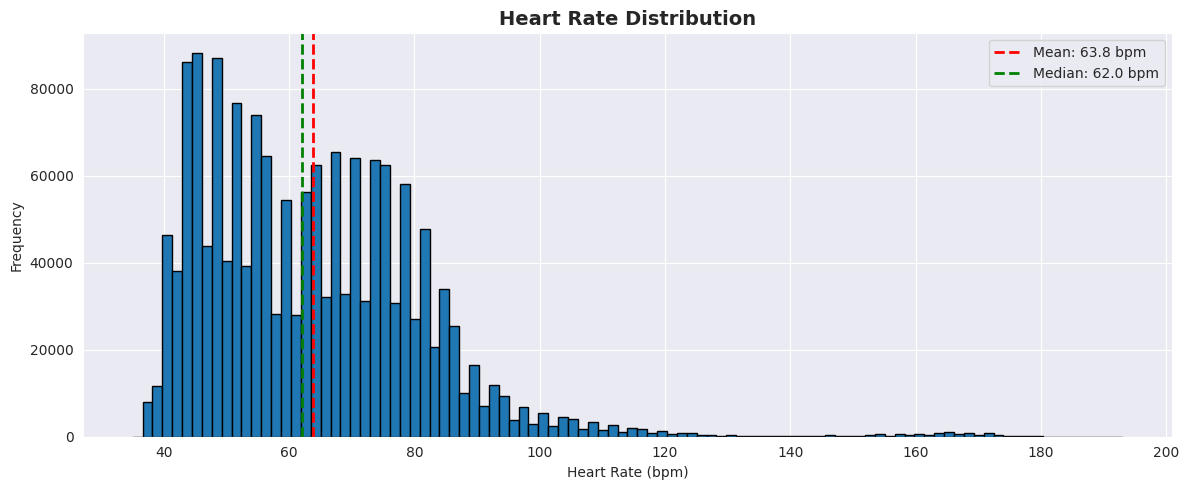

In [10]:
hr_df = df[df['measurement'] == 'HeartRate_Intraday'].copy()

if len(hr_df) > 0:
    print("\nHEART RATE STATISTICS:")
    print("="*70)
    print(f"Total HR records:     {len(hr_df):,}")
    print(f"Average HR:           {hr_df['field_value'].mean():.1f} bpm")
    print(f"Median HR:            {hr_df['field_value'].median():.1f} bpm")
    print(f"Min HR:               {hr_df['field_value'].min():.1f} bpm")
    print(f"Max HR:               {hr_df['field_value'].max():.1f} bpm")
    print(f"Std Dev:              {hr_df['field_value'].std():.1f} bpm")
    
    # Distribution
    fig, ax = plt.subplots(figsize=(12, 5))
    hr_df['field_value'].hist(bins=100, ax=ax, edgecolor='black')
    ax.set_title('Heart Rate Distribution', fontsize=14, fontweight='bold')
    ax.set_xlabel('Heart Rate (bpm)')
    ax.set_ylabel('Frequency')
    ax.axvline(hr_df['field_value'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {hr_df["field_value"].mean():.1f} bpm')
    ax.axvline(hr_df['field_value'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {hr_df["field_value"].median():.1f} bpm')
    ax.legend()
    plt.tight_layout()
    plt.show()

## Quick Stats: Sleep


SLEEP STATISTICS:
Total sleep records:           53
Avg sleep efficiency:          87.7%
Avg minutes asleep:            376 min (6.3 hrs)
Avg minutes in bed:            439 min (7.3 hrs)
Avg deep sleep:                60 min
Avg light sleep:               244 min
Avg REM sleep:                 73 min
Avg awake time:                63 min


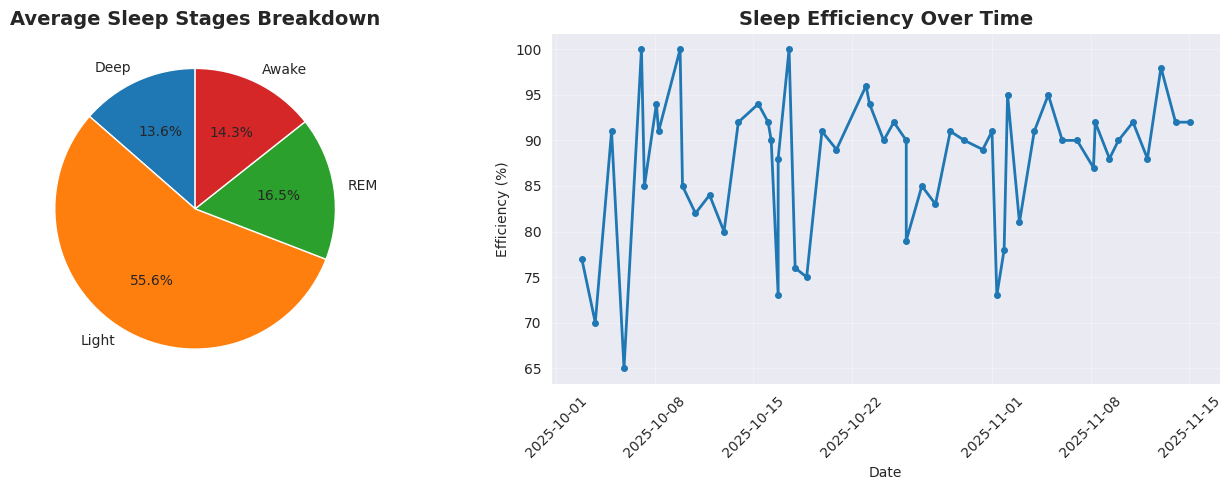

In [11]:
sleep_df = df[df['measurement'] == 'SleepSummary'].copy()

if len(sleep_df) > 0:
    print("\nSLEEP STATISTICS:")
    print("="*70)
    print(f"Total sleep records:           {len(sleep_df)}")
    print(f"Avg sleep efficiency:          {sleep_df['field_efficiency'].mean():.1f}%")
    print(f"Avg minutes asleep:            {sleep_df['field_minutesAsleep'].mean():.0f} min ({sleep_df['field_minutesAsleep'].mean()/60:.1f} hrs)")
    print(f"Avg minutes in bed:            {sleep_df['field_minutesInBed'].mean():.0f} min ({sleep_df['field_minutesInBed'].mean()/60:.1f} hrs)")
    print(f"Avg deep sleep:                {sleep_df['field_minutesDeep'].mean():.0f} min")
    print(f"Avg light sleep:               {sleep_df['field_minutesLight'].mean():.0f} min")
    print(f"Avg REM sleep:                 {sleep_df['field_minutesREM'].mean():.0f} min")
    print(f"Avg awake time:                {sleep_df['field_minutesAwake'].mean():.0f} min")
    
    # Sleep stages breakdown
    sleep_stages = {
        'Deep': sleep_df['field_minutesDeep'].mean(),
        'Light': sleep_df['field_minutesLight'].mean(),
        'REM': sleep_df['field_minutesREM'].mean(),
        'Awake': sleep_df['field_minutesAwake'].mean()
    }
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Pie chart
    ax1.pie(sleep_stages.values(), labels=sleep_stages.keys(), autopct='%1.1f%%', startangle=90)
    ax1.set_title('Average Sleep Stages Breakdown', fontsize=14, fontweight='bold')
    
    # Sleep efficiency over time
    sleep_df_sorted = sleep_df.sort_values('time')
    ax2.plot(sleep_df_sorted['time'], sleep_df_sorted['field_efficiency'], marker='o', linewidth=2, markersize=4)
    ax2.set_title('Sleep Efficiency Over Time', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('Efficiency (%)')
    ax2.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

## Quick Stats: Activity


ACTIVITY STATISTICS:
Avg daily steps:              6,998
Max daily steps:              21,130
Min daily steps:              2,131
Avg daily calories:           2,635
Avg daily distance:           3.37 km


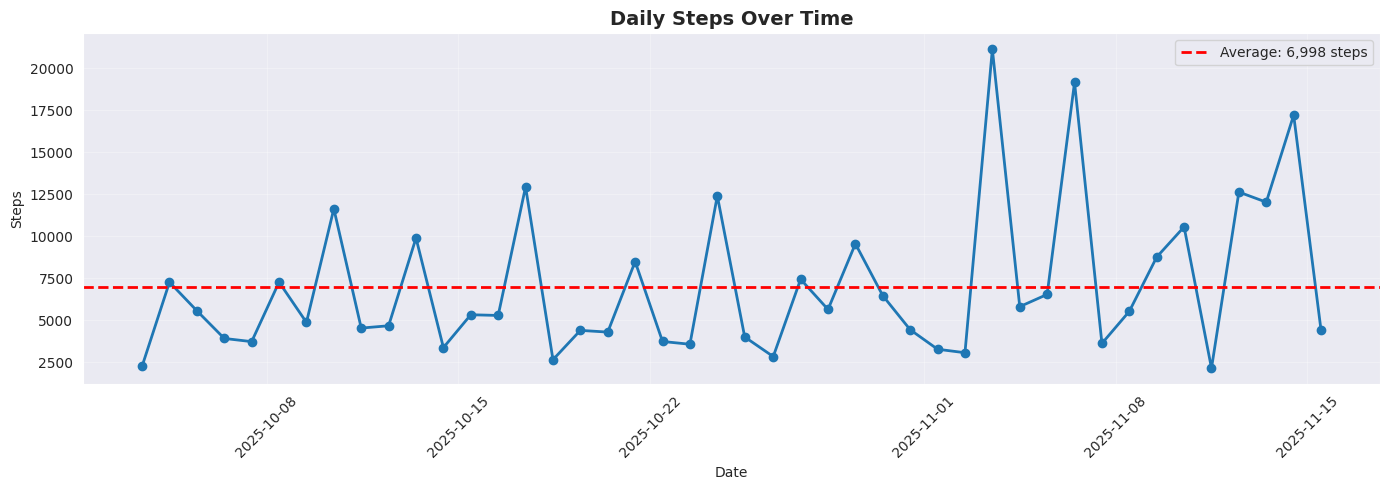

In [12]:
steps_df = df[df['measurement'] == 'Activity-steps'].copy()

if len(steps_df) > 0:
    print("\nACTIVITY STATISTICS:")
    print("="*70)
    print(f"Avg daily steps:              {steps_df['field_value'].mean():,.0f}")
    print(f"Max daily steps:              {steps_df['field_value'].max():,.0f}")
    print(f"Min daily steps:              {steps_df['field_value'].min():,.0f}")
    
    calories_df = df[df['measurement'] == 'Activity-calories']
    if len(calories_df) > 0:
        print(f"Avg daily calories:           {calories_df['field_value'].mean():,.0f}")
    
    distance_df = df[df['measurement'] == 'Activity-distance']
    if len(distance_df) > 0:
        print(f"Avg daily distance:           {distance_df['field_value'].mean():.2f} km")
    
    # Steps over time
    fig, ax = plt.subplots(figsize=(14, 5))
    steps_df_sorted = steps_df.sort_values('time')
    ax.plot(steps_df_sorted['time'], steps_df_sorted['field_value'], marker='o', linewidth=2, markersize=6)
    ax.axhline(steps_df['field_value'].mean(), color='red', linestyle='--', linewidth=2, label=f'Average: {steps_df["field_value"].mean():,.0f} steps')
    ax.set_title('Daily Steps Over Time', fontsize=14, fontweight='bold')
    ax.set_xlabel('Date')
    ax.set_ylabel('Steps')
    ax.grid(True, alpha=0.3)
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Data Types Overview

In [13]:
print("\nDATA TYPES:")
print("="*70)
print(df.dtypes)


DATA TYPES:
measurement                                object
time                          datetime64[ns, UTC]
tag_Device                                 object
field_value                               float64
field_dailyRmssd                          float64
field_deepRmssd                           float64
field_nightlyRelative                     float64
field_avg                                 float64
field_max                                 float64
field_min                                 float64
field_Out of Range                        float64
field_Fat Burn                            float64
field_Cardio                              float64
field_Peak                                float64
tag_isMainSleep                            object
field_efficiency                          float64
field_minutesAsleep                       float64
field_minutesInBed                        float64
field_minutesAwake                        float64
field_minutesLight                   

## Memory Usage by Column

In [14]:
memory_usage = df.memory_usage(deep=True).sort_values(ascending=False)
memory_usage_mb = memory_usage / 1024 / 1024

print("\nTOP 10 COLUMNS BY MEMORY USAGE:")
print("="*70)
for col, mb in memory_usage_mb.head(10).items():
    print(f"{col:35s} {mb:8.2f} MB")

print(f"\nTotal: {memory_usage_mb.sum():.2f} MB")


TOP 10 COLUMNS BY MEMORY USAGE:
measurement                           122.95 MB
tag_Device                            111.35 MB
date                                   65.80 MB
tag_ActivityID                         40.45 MB
tag_isMainSleep                        39.55 MB
field_endTime                          39.48 MB
tag_ActivityName                       39.48 MB
tag_Source                             39.48 MB
field_lat                              13.16 MB
field_activeDuration                   13.16 MB

Total: 1038.13 MB
